# Overview:
This is a simple project to test out some OCR libraries:
- We want to check that images can be read into the notebook
- The images can be scanned 

## Install Dependencies

In [1]:
# !pip3 install torch torchvision torchaudio
# !pip install easyocr

In [2]:
import easyocr
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np

## Read in Images

* Create a new reader object to read text from the img path.
* Result should show coordinates, word in the image and percentage of confidence.
* To use GPU change gpu attribute to True.

In [3]:
IMAGE_PATH = 'images/north_high_st_sign.jpg'

In [4]:
reader = easyocr.Reader(['en'], gpu=False)
result = reader.readtext(IMAGE_PATH)
result

Using CPU. Note: This module is much faster with a GPU.
[W NNPACK.cpp:79] Could not initialize NNPACK! Reason: Unsupported hardware.


[([[1499, 651], [1615, 651], [1615, 845], [1499, 845]],
  '0',
  0.16875990478698455),
 ([[608, 1006], [682, 1006], [682, 1098], [608, 1098]],
  'N',
  0.9998233396357961),
 ([[699, 943], [1341, 943], [1341, 1150], [699, 1150]],
  'HIGH st',
  0.8716253991672435),
 ([[31, 1267], [239, 1267], [239, 1471], [31, 1471]],
  'ell',
  0.2171081257832865),
 ([[215, 1349], [283, 1349], [283, 1443], [215, 1443]],
  'NL',
  0.35837183538578565),
 ([[876.9675818812403, 460.01300068524097],
   [1554.731223943273, 601.8792369867937],
   [1466.0324181187598, 938.986999314759],
   [788.2687760567269, 797.1207630132063]],
  'CHAsL ',
  0.05264811868625732)]

## Draw Results

### Setting coordinate variables

In [5]:
#grab these values from the correct array within the result
#set coordinates for the value
top_left = tuple(result[2][0][0])
bottom_right = tuple(result[2][0][2])
text = result[2][1]
font = cv.FONT_HERSHEY_SIMPLEX

### Set up Visualization of the image with Rectangle/Text Overlay

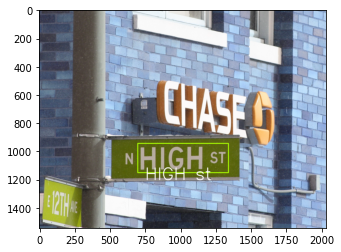

In [10]:
img = cv.imread(IMAGE_PATH)
img = cv.rectangle(img, top_left, bottom_right,(170,255,0), 5)

# specific coordinates were put in ([29,90]) so that text overlay would show up correctly
img = cv.putText(img, text, [750,1200], font, 4, (255,255,255), 5, cv.LINE_AA) 
plt.imshow(img)
plt.show()